# Duffing Oscillator

---

This notebook implements the [Duffing oscillator](http://www.scholarpedia.org/article/Duffing_oscillator) in Julia. Similer to the [Lorenz Attractor](https://github.com/JuliaLang/ODE.jl/blob/master/examples/Lorenz_Attractor.ipynb), Duffing oscillator is also a chaotic attractor system.

![Duffing Oscillator](https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/Forced_Duffing_equation_Poincaré_section.png/638px-Forced_Duffing_equation_Poincaré_section.png)

Image courtesy of [WikiMedia](https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/Forced_Duffing_equation_Poincaré_section.png/638px-Forced_Duffing_equation_Poincaré_section.png)

The Duffing oscillator is formally described by a second-order differential equation. In the following equations, $t$ represents time, and the $x$ is the function of position.

$$ \frac{d^2x}{dt^2} + \delta \frac{dx}{dt} + \beta x + \alpha x^3 = 0 $$

---

In order to use the ODE.jl package to solve this problem. We need to rewrite this second-oder differential equation into a system of first-order differential equations as following.

$$ \begin{cases} 
  v'(t) = \gamma cos ( \omega t ) - ( \delta v + \beta x + \alpha x^3 )
  \\\\ 
  x'(t) = v(t)
\end{cases} $$

In [1]:
using ODE;
using PyPlot;

In [2]:
function duffing_oscillator(t, y)
    (v, x) = y

    v_prime = γ * cos(ω * t) - (δ * v + β * x + α * x^3)
    x_prime = v

    [v_prime, x_prime]
end;

<b>Set parameters values</b>

In [3]:
α = 1;
β = -1;
δ = 0.2;
γ = 0.3;
ω = 1;

<b>Set initial values and time interval. <i>Attention</i>: The initial values have to correspond to what the previous
function returns.</b>

In [4]:
start = [1.0, pi - 1e-3];
time = [0:0.0125:200;];
tspan_warming_up = [0:0.0125:1;];

<b>Warm up the JIT with a small time span</b>

In [5]:
ODE.ode78(duffing_oscillator, start, tspan_warming_up);
ODE.ode23s(duffing_oscillator, start, tspan_warming_up);

<b>Using different solvers and different tolerances</b> (The comparison will be in the following notebook)

ode78 is an adaptive explicit [Runge-Kutta](https://en.wikipedia.org/wiki/Runge–Kutta_methods) solver, and ode23s (better for stiff problem, but slower than explicit) is a implicit [Runge-Kutta](https://en.wikipedia.org/wiki/Runge–Kutta_methods) solver.

The lower the tolerance values are the smaller the step size the solver will use. Therefore, small tol (tolerance) will give us a more accurate result.

In [6]:
@time (t, y) = ode78(duffing_oscillator, start, time, points=:specified, reltol = 1e-16, abstol = 1e-16);
@time (t1, y1) = ode23s(duffing_oscillator, start, time, points=:specified);
@time (t2, y2) = ode23s(duffing_oscillator, start, time, reltol = 1e-9, abstol = 1e-9, points=:specified);

  0.140947 seconds (1.73 M allocations: 35.325 MB, 4.88% gc time)
  0.618859 seconds (1.74 M allocations: 133.767 MB, 4.16% gc time)
  9.779126 seconds (23.11 M allocations: 2.046 GB, 3.98% gc time)


<b>Exctract velocity $x'(t)$ and position $x(t)$ arrays</b>

In [7]:
velocity = map(f -> f[1], y);
position = map(f -> f[2], y);
velocity1 = map(f -> f[1], y1);
position1 = map(f -> f[2], y1);
velocity2 = map(f -> f[1], y2);
position2 = map(f -> f[2], y2);

<b>Plot a [limit cycle](https://en.wikipedia.org/wiki/Limit_cycle) graph of this system</b>

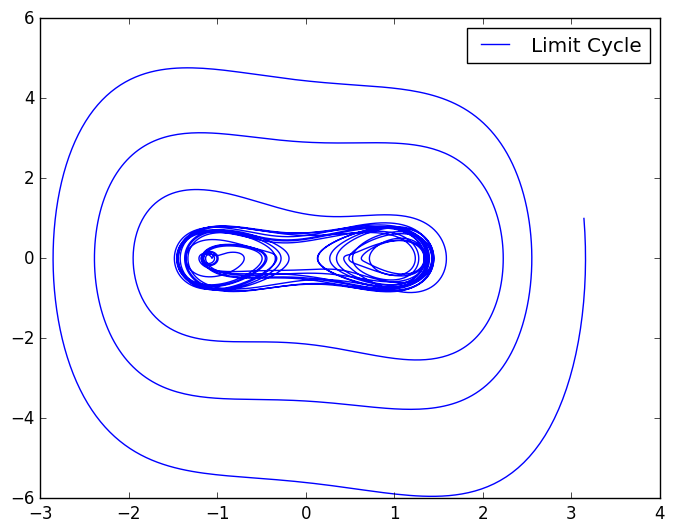

In [8]:
PyPlot.plot(position2, velocity2, label="Limit Cycle");
legend();

<b>Comparison between ode23s(low_tol) and ode78</b>

---

The results of ode23s(low_tol) and ode78 didn't have much differences.

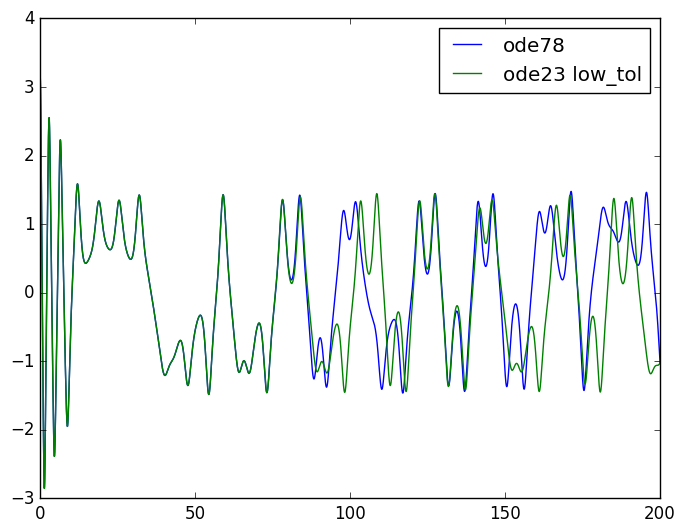

In [9]:
PyPlot.plot(t, position, label="ode78");
PyPlot.plot(t, position2, label="ode23 low_tol");
legend();

<b>Comparison between ode23s with differet tolerance</b>

With a higher tolance, ode23 didn't do a good job.

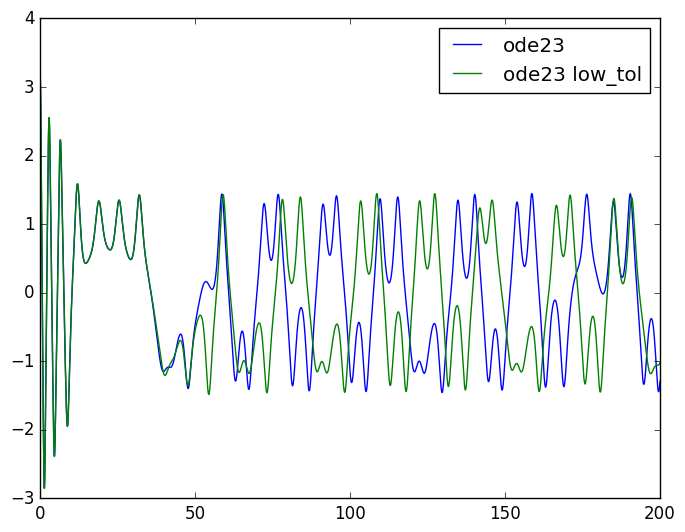

In [10]:
PyPlot.plot(t, position1, label="ode23");
PyPlot.plot(t, position2, label="ode23 low_tol");
legend();

<b>Differences analysis</b> (Assume ode23s has the best result)

ode23s uses [Rosenbrock methods](https://en.wikipedia.org/wiki/Rosenbrock_methods). Rosenbrock methods is good for stiff system.

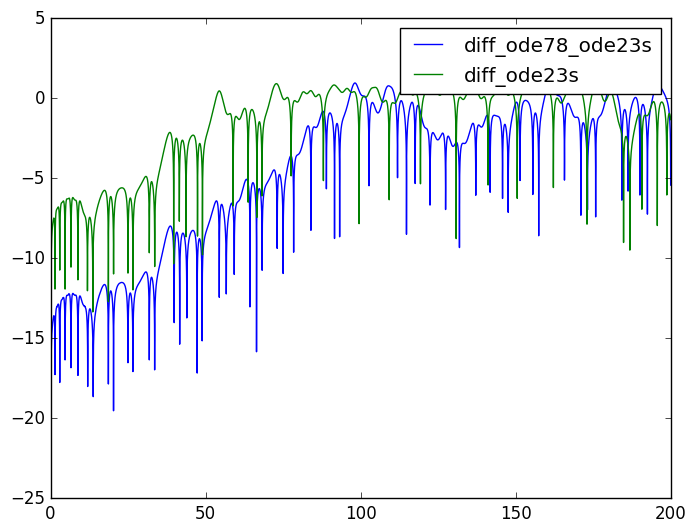

In [11]:
diff_ode78_ode23s = log(abs(position - position2));
diff_ode78_ode23s_low_tol = log(abs(position1 - position2));

PyPlot.plot(t, diff_ode78_ode23s, label="diff_ode78_ode23s");
PyPlot.plot(t, diff_ode78_ode23s_low_tol, label="diff_ode23s");
PyPlot.legend();